# Checkpoint 1

Reminder:

- You are being evaluated for compeletion and effort in this checkpoint.
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [71]:
df = pd.read_csv("states_edu.csv")
df.head(50)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN
6,1992_CONNECTICUT,CONNECTICUT,1992,NaN,3834302.0,143542.0,1342539.0,2348221.0,3721338.0,2148041.0,...,38058.0,33691.0,28366.0,NaN,NaN,488476.0,227.0,274.0,222.0,NaN
7,1992_DELAWARE,DELAWARE,1992,NaN,645233.0,45945.0,420942.0,178346.0,638784.0,372722.0,...,8272.0,8012.0,6129.0,NaN,NaN,104321.0,218.0,263.0,213.0,NaN
8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,NaN,709480.0,64749.0,0.0,644731.0,742893.0,329160.0,...,5832.0,5000.0,3433.0,NaN,NaN,80937.0,193.0,235.0,188.0,NaN
9,1992_FLORIDA,FLORIDA,1992,NaN,11506299.0,788420.0,5683949.0,5033930.0,11305642.0,5166374.0,...,164416.0,142372.0,100835.0,NaN,NaN,1981407.0,214.0,260.0,208.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [84]:
df.columns
df.rename({"PRIMARY KEY": "Year_State", "ENROLL" : "# of Students Enrolled"}, inplace = True)
df.dropna(inplace = True)
# df.drop(["FEDERAL_REVENUE", "STATE_REVENUE", "LOCAL_REVENUE"], inplace = True)
# df.drop(["GRADES_8_G", "GRADES_9_12_G", "GRADES_1_8_G"], axis = 1, inplace = True)
df
df1 = df[["GRADES_4_G", "STATE", "YEAR", "AVG_MATH_4_SCORE", "INSTRUCTION_EXPENDITURE"]]
df1['Z_SCORE 4th Grade Performance'] = (df1['AVG_MATH_4_SCORE'] - df1['AVG_MATH_4_SCORE'].mean()) / df1['AVG_MATH_4_SCORE'].std()

<ipython-input-84-e14ce6541166>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Z_SCORE 4th Grade Performance'] = (df1['AVG_MATH_4_SCORE'] - df1['AVG_MATH_4_SCORE'].mean()) / df1['AVG_MATH_4_SCORE'].std()


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *ENTER YOUR CHOICE HERE*

How many years of data are logged in our dataset?

In [47]:
df1["YEAR"].nunique()

7

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [85]:
val1 =df1.loc[df1['STATE'] == 'MICHIGAN']["AVG_MATH_4_SCORE"].mean()
val2= df1.loc[df1['STATE'] == 'OHIO']["AVG_MATH_4_SCORE"].mean()
val3= df1.loc[df1['STATE'] == 'MASSACHUSETTS']["AVG_MATH_4_SCORE"].mean()
d = {}
d['Michigan'] = val1,
d["Ohio"] =  val2
print(val3)
print(d)

#Using zscores to calculate the performance of these states in a standardized way, Ohio had a higher average outcome score`

250.0
{'Michigan': (236.71428571428572,), 'Ohio': 243.28571428571428}


Find the average for your outcome score across all states in 2019

In [82]:
df[df["YEAR"] ==2019]["AVG_MATH_4_SCORE"].mean()

239.9433962264151

Find the maximum outcome score for every state.

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [83]:
df.groupby("STATE")["AVG_MATH_4_SCORE"].max()

STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable.

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [86]:
df.columns
df.rename({"PRIMARY KEY": "Year_State", "ENROLL" : "# of Students Enrolled"}, inplace = True)
df.dropna(inplace = True)
df
df1 = df[["GRADES_4_G", "STATE", "YEAR", "AVG_MATH_4_SCORE", "INSTRUCTION_EXPENDITURE"]]
df1
df1['Z_SCORE 4th Grade Performance'] = (df1['AVG_MATH_4_SCORE'] - df1['AVG_MATH_4_SCORE'].mean()) / df1['AVG_MATH_4_SCORE'].std()
df1.drop("AVG_MATH_4_SCORE",axis=1, inplace = True)
df1.groupby("STATE")
df1

<ipython-input-86-3bc34a70c131>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Z_SCORE 4th Grade Performance'] = (df1['AVG_MATH_4_SCORE'] - df1['AVG_MATH_4_SCORE'].mean()) / df1['AVG_MATH_4_SCORE'].std()
<ipython-input-86-3bc34a70c131>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop("AVG_MATH_4_SCORE",axis=1, inplace = True)


,GRADES_4_G,STATE,YEAR,INSTRUCTION_EXPENDITURE,Z_SCORE 4th Grade Performance
561,57323.0,ALABAMA,2003,2817111.0,-2.412919
562,10115.0,ALASKA,2003,763525.0,-0.898713
563,76207.0,ARIZONA,2003,2810907.0,-1.504395
564,34070.0,ARKANSAS,2003,1768713.0,-1.504395
565,493415.0,CALIFORNIA,2003,29561563.0,-1.807236
...,...,...,...,...,...
1219,96851.0,VIRGINIA,2015,8755896.0,1.221175
1220,82404.0,WASHINGTON,2015,6508964.0,0.918334
1221,19814.0,WEST_VIRGINIA,2015,1819903.0,-0.595872
1222,60999.0,WISCONSIN,2015,5723474.0,0.615493


I made a ZScore rating to change the avg math scores into values that make more intuitive sense to an outside viewer. Instead of looking at scores that were all in the 200s, the Zscore standardizes the data

Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '4th Grade Math Performance (Z-Score)')

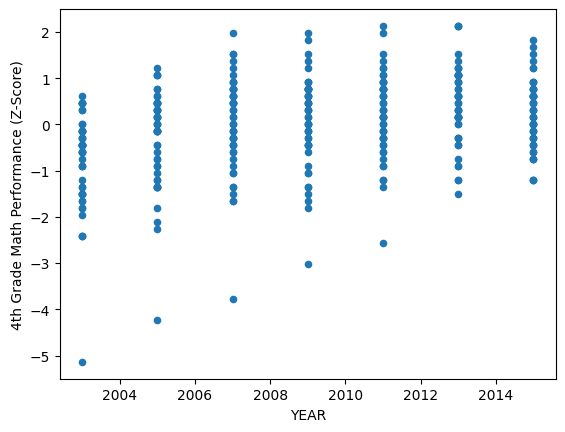

In [93]:
df1.plot.scatter(x='YEAR', y='Z_SCORE 4th Grade Performance', alpha=1)
plt.xlabel('YEAR')
plt.ylabel('4th Grade Math Performance (Z-Score)')

**<How Time Has Impacted 4th Grade Math Scores>** The visualization shows me that the more recent the year is, the less pronounced the gap is from the lower ends of students. In other words, the gap between the worst and best students dramatically reduced in zscores. This is reasonable to me because education has become more equitable in the present day. I noticed that the top end of performers increased, but by very little. In fact, it regressed in several years too. This was a little shocking because I would imagine the upper end of students to perform better, but it makes sense that their is almost an invisible cap to their performance. For the most part, the students are within one standard deviation of the mean, which I expected. All in all, over time, 4th grader's math scores have progressed as a whole in becoming closer together.

**Visualization 2**

Text(0, 0.5, '4th Grade Math Performance (Z-Score)')

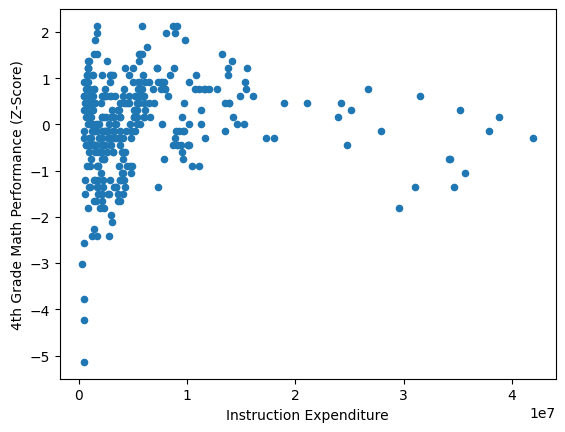

In [94]:
df1.plot.scatter(x='INSTRUCTION_EXPENDITURE', y='Z_SCORE 4th Grade Performance', alpha=1)
plt.xlabel('Instruction Expenditure')
plt.ylabel('4th Grade Math Performance (Z-Score)')

<How Instruction Expenditure impacts 4th Grade Math Scores> It is quite shocking that instruction expenditure did not increase the performance of 4th graders that much. I would expect that the more money there is towards instruction, the better the 4th graders would do. However, on the contrary, I did ntoice that the variance of the 4th grader scores minimized the more instruction expenditure increased. THis may be because instead of everyone getting better education, everyone is getting equal quality of education as the instruction expenditure increases

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X = df1[["INSTRUCTION_EXPENDITURE", "YEAR"]]
y = df1.loc[X.index]['Z_SCORE 4th Grade Performance']

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [115]:
from sklearn.linear_model import LinearRegression

In [116]:
model = LinearRegression()

In [117]:
model.fit(X_train, y_train)

LinearRegression()

In [119]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

We have copied over the graphs that visualize the model's performance on the training and testing set.

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

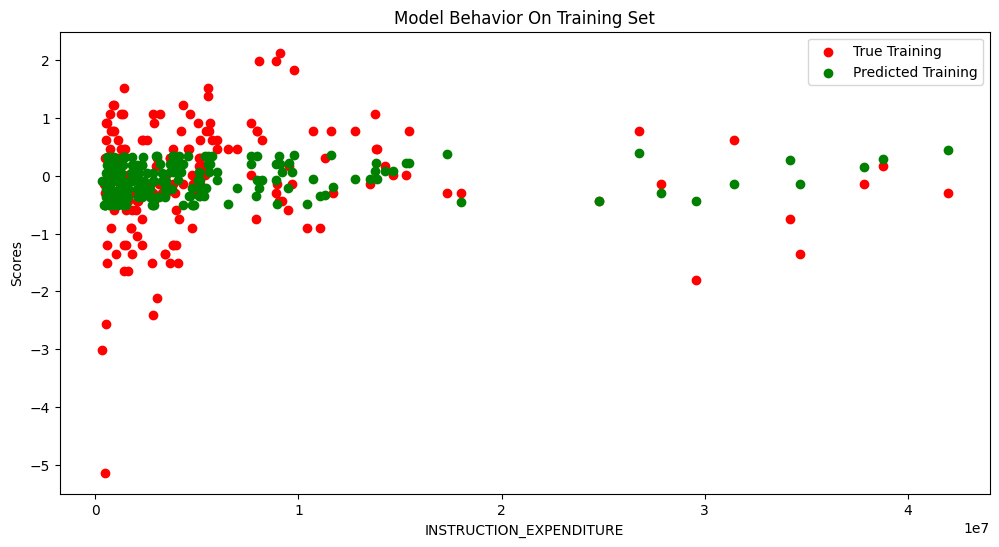

In [120]:
col_name = "INSTRUCTION_EXPENDITURE"

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel("INSTRUCTION_EXPENDITURE")
plt.ylabel('Scores')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

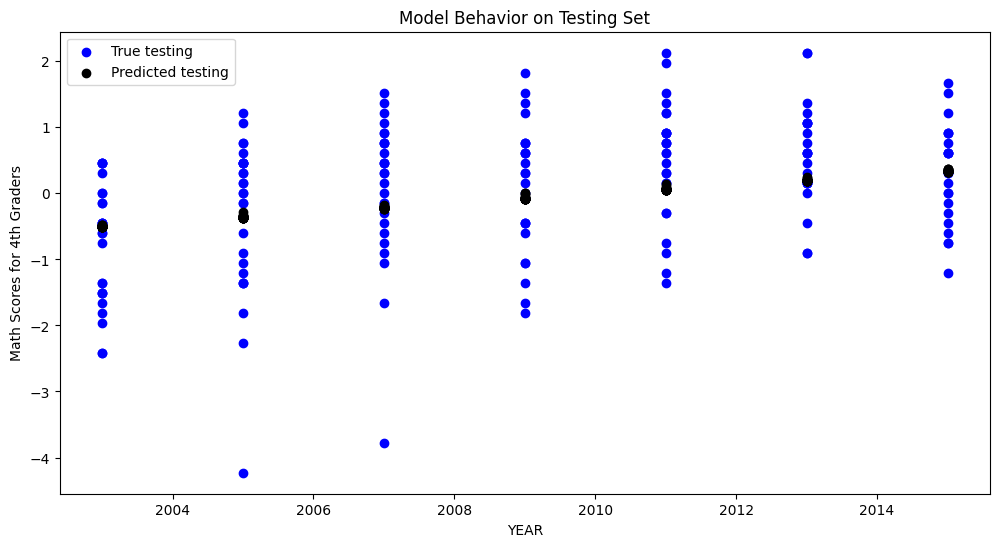

In [124]:
col_name = "YEAR"

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel("YEAR")
plt.ylabel('Math Scores for 4th Graders')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK, FINDINGS, AND THE PERFORMANCE OF YOUR MODEL\>** My work was to clean up the data of the large data set such that there were only values that pertained to the 4th graders and their math scores. After this preliminary sifting, I isolated a few key variables that I thought would impact their scores over time. I thought that the money spent on Instruction would be a good variable to test because it is almost intuitive that more money for school allows for better education. Moreover, I wanted to see how the overall progression of the standard for 4th grade scores changed over time with the advancement of technology and learning tools, which is why I evaluated the YEAR's column and its impact on the 4th graders average math score. I standardized the math scores using a zscore formula because I thought that doing so would be a good way to interpret the numbers. Before then, reading the scores of 200s just seemed arbitrary to me, so this helped put it better into perspective. I also dropped any na values, but I could have alternately filled it using the median values. However, for the sake of this experiment, I wanted to use given data and not estimated data. For my first model that investigated the impact of instruction spending, the model performed quite well, but the values remained mostly centralized. As such, the general shape was evident but not as accentuated as the true data set. It was a little harder to interpret the model's performance for the YEAR vs Scores graph. It did, in fact mark the slow positive linear correlation I had observed, but only focused on one line. Potentially investigating how to make parallel lines in future visualizations may help me better evaluate how the top end, middle, and bottom end of the 4th graders performed as time passed. Overall, I believe that my work shows some key correlations, but there are some areas of improvement. My time in MDST will help me solidify my understanding of data science and transform my visualizations from amateur data science to professional data science.
